In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [279]:
data_set=pd.read_csv("Housing.csv")
df=pd.DataFrame(data_set)
df.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [280]:
df.shape

(20640, 10)

In [281]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [282]:
df.dropna(inplace=True)

In [283]:
x=df.drop(["median_house_value"],axis=1)
y=df["median_house_value"]


In [284]:
for column in df.columns:
    print(df[column].value_counts())
    print("#*"*30)

longitude
-118.31    159
-118.30    157
-118.29    146
-118.27    141
-118.32    141
          ... 
-123.72      1
-115.95      1
-115.80      1
-116.55      1
-123.47      1
Name: count, Length: 844, dtype: int64
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
latitude
34.06    241
34.08    232
34.05    229
34.07    227
34.04    215
        ... 
32.54      1
40.74      1
40.24      1
34.84      1
35.88      1
Name: count, Length: 861, dtype: int64
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
housing_median_age
52.0    1265
36.0     856
35.0     818
16.0     762
17.0     694
34.0     682
26.0     611
33.0     609
25.0     562
32.0     560
18.0     560
37.0     528
15.0     507
19.0     499
27.0     482
24.0     473
30.0     470
28.0     468
20.0     462
29.0     453
31.0     449
23.0     445
21.0     444
14.0     410
22.0     395
38.0     385
39.0     366
42.0     363
44.0     353
43.0     351
40.0     301
13.0     298
41.0     293
45.0     286
10.0     263

In [285]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [286]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8098,-118.22,33.81,38.0,1486.0,359.0,1345.0,326.0,3.3988,NEAR OCEAN
8487,-118.30,33.91,34.0,1617.0,493.0,1530.0,500.0,2.6182,<1H OCEAN
2009,-119.82,36.72,25.0,2581.0,528.0,1642.0,509.0,1.6435,INLAND
17587,-121.92,37.30,36.0,2088.0,358.0,772.0,347.0,4.2762,<1H OCEAN
7599,-118.25,33.89,36.0,406.0,71.0,268.0,77.0,3.9000,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
2539,-124.16,40.80,52.0,2416.0,618.0,1150.0,571.0,1.7308,NEAR OCEAN
4050,-118.56,34.14,23.0,9657.0,1189.0,3585.0,1162.0,10.4399,<1H OCEAN
9836,-121.89,36.63,20.0,1834.0,554.0,971.0,514.0,3.0383,<1H OCEAN
9251,-120.09,36.95,16.0,3222.0,511.0,1425.0,503.0,4.1544,INLAND


In [287]:
Input=x_train.join(y_train)
Input=Input.join(pd.get_dummies(Input["ocean_proximity"],dtype=int))
print(Input["ocean_proximity"].unique())
Input.drop(["ocean_proximity"],axis=1,inplace=True)
Input.drop(["ISLAND"],axis=1,inplace=True)
Input

['NEAR OCEAN' '<1H OCEAN' 'INLAND' 'NEAR BAY' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
8098,-118.22,33.81,38.0,1486.0,359.0,1345.0,326.0,3.3988,147800.0,0,0,0,1
8487,-118.30,33.91,34.0,1617.0,493.0,1530.0,500.0,2.6182,172600.0,1,0,0,0
2009,-119.82,36.72,25.0,2581.0,528.0,1642.0,509.0,1.6435,52600.0,0,1,0,0
17587,-121.92,37.30,36.0,2088.0,358.0,772.0,347.0,4.2762,310100.0,1,0,0,0
7599,-118.25,33.89,36.0,406.0,71.0,268.0,77.0,3.9000,115800.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,-124.16,40.80,52.0,2416.0,618.0,1150.0,571.0,1.7308,80500.0,0,0,0,1
4050,-118.56,34.14,23.0,9657.0,1189.0,3585.0,1162.0,10.4399,500001.0,1,0,0,0
9836,-121.89,36.63,20.0,1834.0,554.0,971.0,514.0,3.0383,217300.0,1,0,0,0
9251,-120.09,36.95,16.0,3222.0,511.0,1425.0,503.0,4.1544,119400.0,0,1,0,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

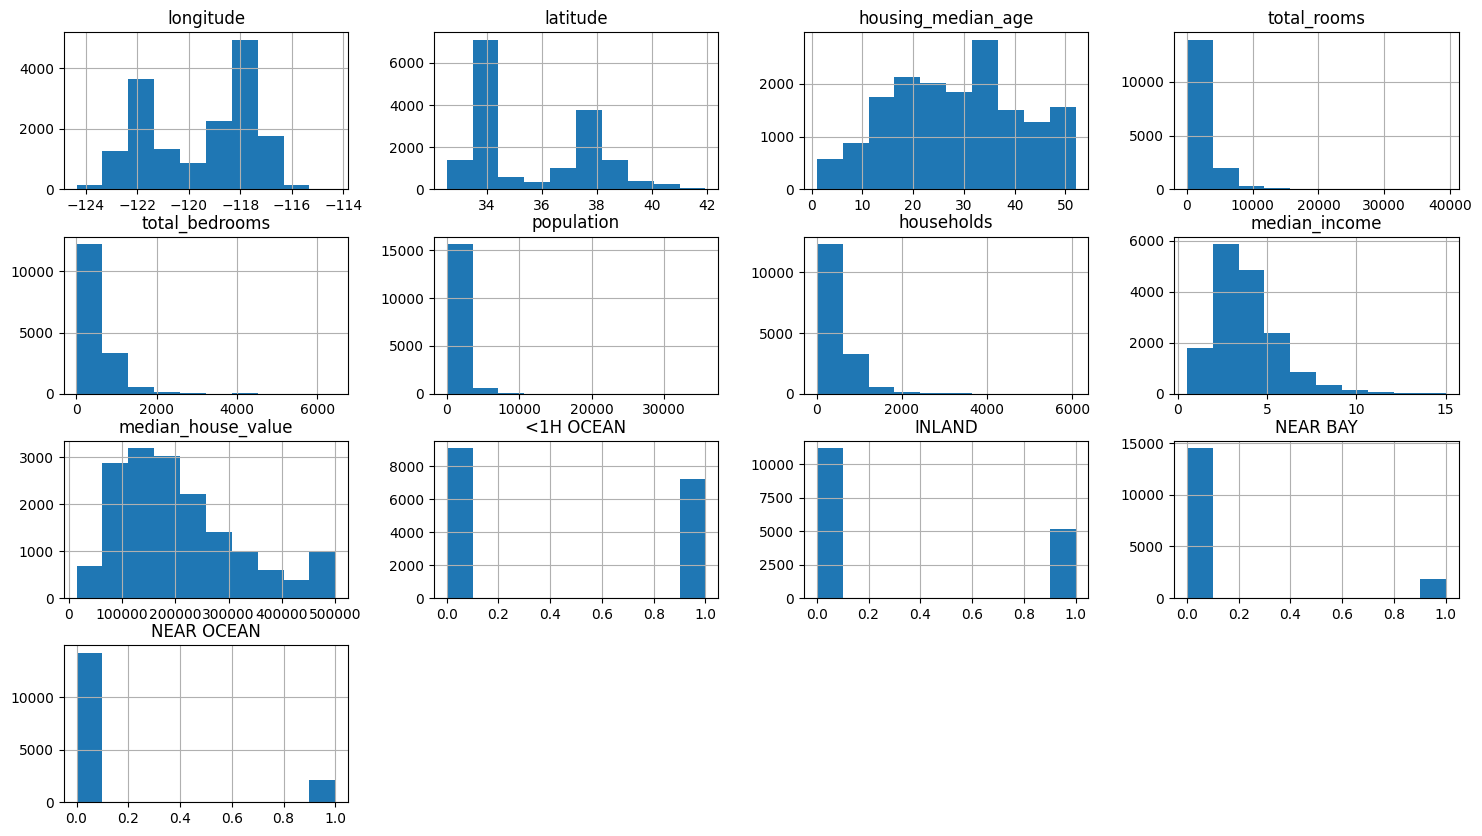

In [288]:
Input.hist(figsize=(18,10))

<Axes: >

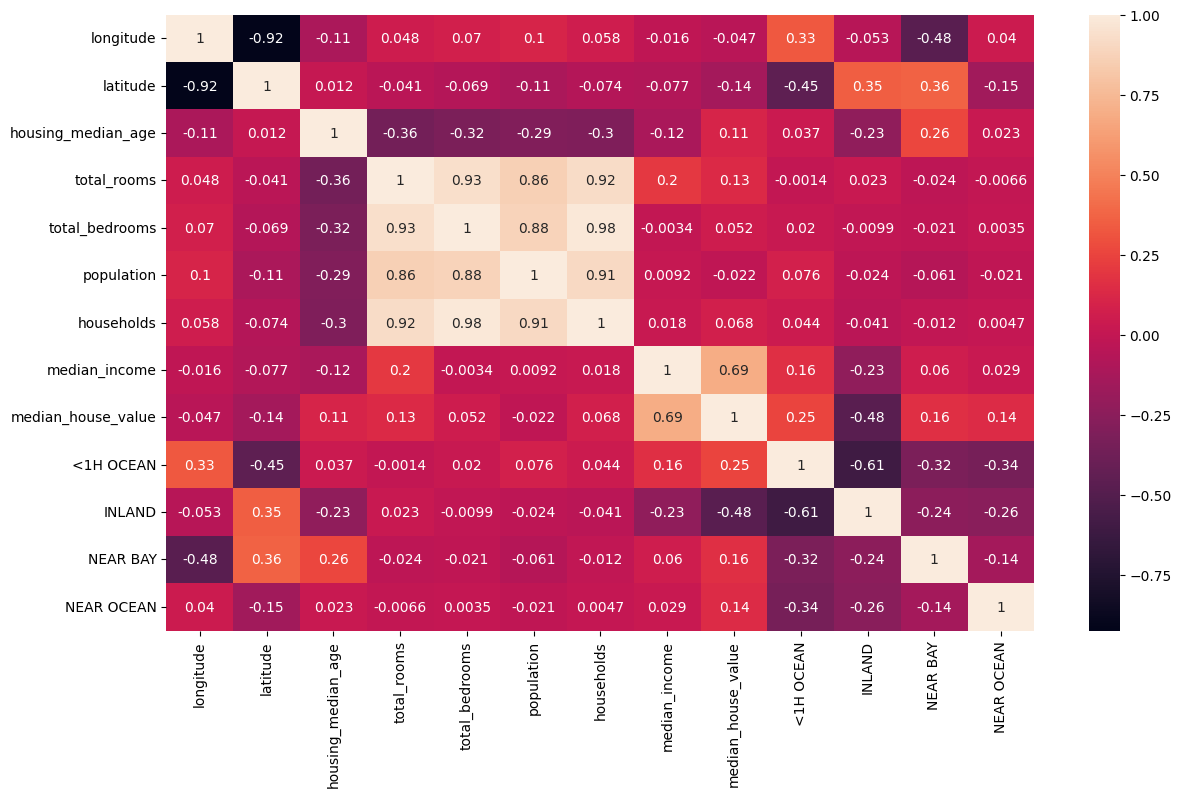

In [289]:
plt.figure(figsize=(14,8))
sns.heatmap(Input.corr(),annot=True)

In [290]:
Input["housing_median_age"]=np.log(Input["housing_median_age"]+1)
Input["total_rooms"]=np.log(Input["total_rooms"]+1)
Input["total_bedrooms"]=np.log(Input["total_bedrooms"]+1)
Input["population"]=np.log(Input["population"]+1)
Input["households"]=np.log(Input["households"]+1)
Input["median_house_value"]=np.log(Input["median_house_value"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

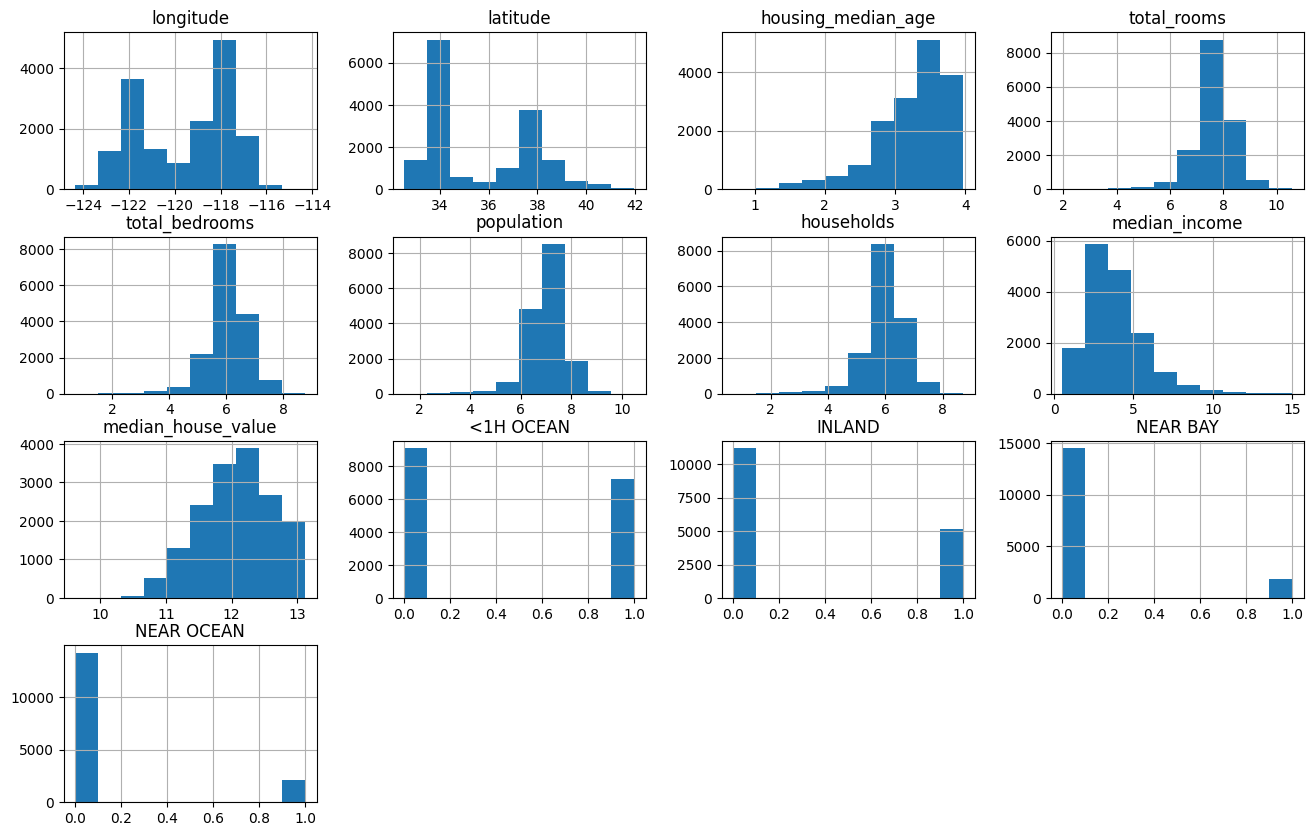

In [291]:
Input.hist(figsize=(16,10))


<Axes: xlabel='latitude', ylabel='longitude'>

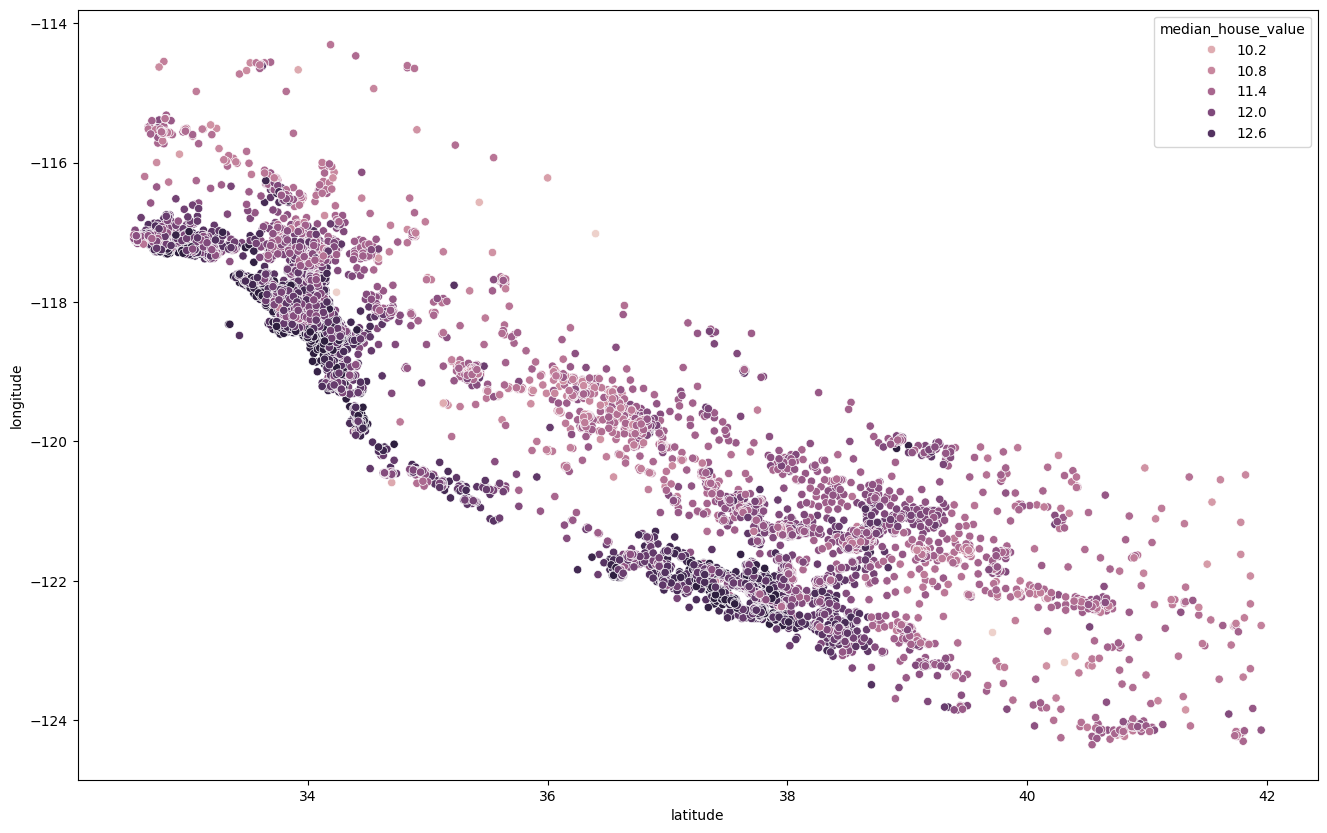

In [292]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="latitude",y="longitude",data=Input,hue="median_house_value")

In [293]:
Input["bathroom_ratio"]=Input["total_bedrooms"]/Input["total_rooms"]
Input["houseroom_ratio"]=Input["total_rooms"]/Input["households"]

<Axes: >

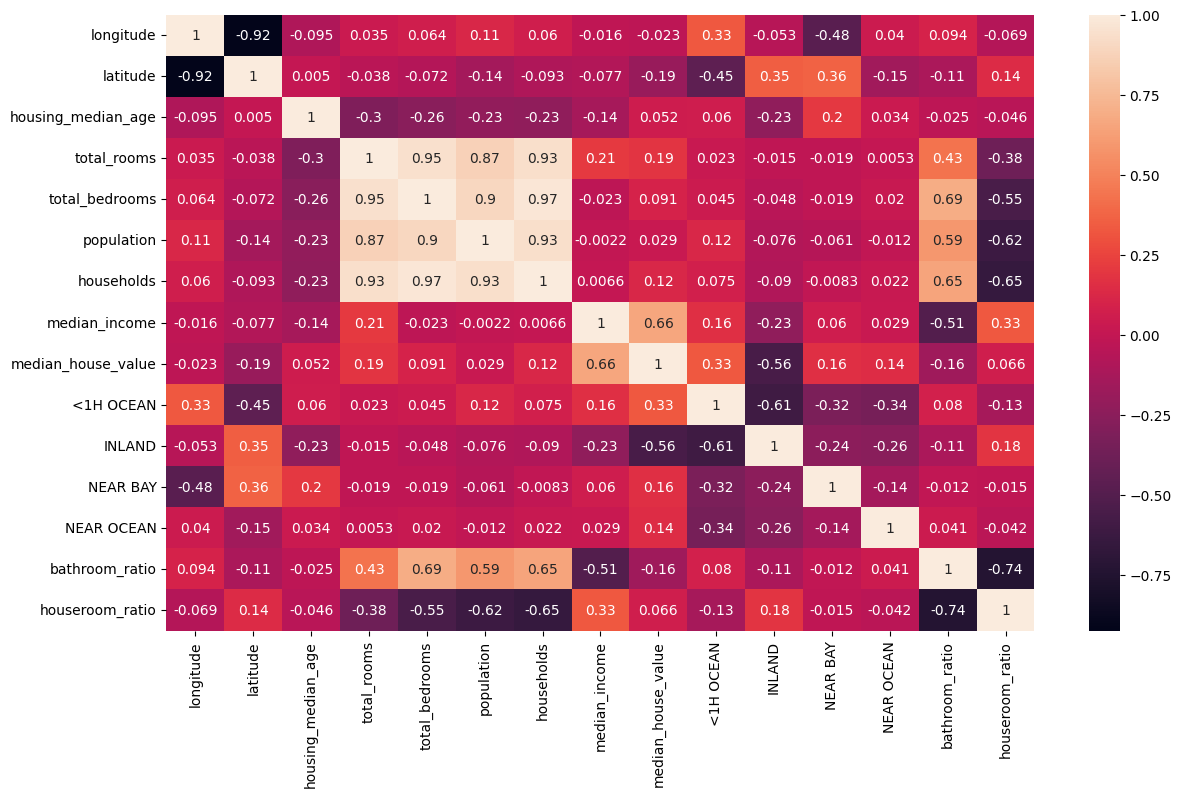

In [294]:
plt.figure(figsize=(14,8))
sns.heatmap(Input.corr(),annot=True)

In [316]:
x_train1,y_train1=Input.drop(['median_house_value'],axis=1),Input["median_house_value"]
LR=LinearRegression()
SC=StandardScaler()
x_train1=SC.fit_transform(x_train1)
LR.fit(x_train1,y_train1)
x_train1.shape

(16346, 14)

In [306]:
Input1=x_test.join(y_test)
Input1=Input1.join(pd.get_dummies(Input1["ocean_proximity"],dtype=int))
print(Input1["ocean_proximity"].unique())
Input1.drop(["ocean_proximity"],axis=1,inplace=True)
Input1

['<1H OCEAN' 'NEAR OCEAN' 'INLAND' 'NEAR BAY' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17215,-119.70,34.43,37.0,1462.0,306.0,678.0,322.0,5.1545,418400.0,1,0,0,0,0
14175,-117.05,32.75,35.0,2144.0,388.0,1003.0,383.0,3.0938,137300.0,0,0,0,0,1
3161,-118.85,35.23,26.0,1639.0,352.0,1222.0,395.0,1.7656,68000.0,0,1,0,0,0
20595,-121.56,39.16,12.0,3349.0,642.0,2029.0,619.0,2.9647,88800.0,0,1,0,0,0
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8963,-118.39,33.99,32.0,2612.0,418.0,1030.0,402.0,6.6030,369200.0,1,0,0,0,0
11726,-120.02,39.24,24.0,1602.0,426.0,751.0,257.0,1.7609,99300.0,0,1,0,0,0
3999,-118.62,34.17,34.0,3268.0,538.0,1463.0,519.0,6.8482,308300.0,1,0,0,0,0
9115,-118.21,34.64,16.0,2573.0,427.0,1273.0,426.0,5.9508,181100.0,0,1,0,0,0


In [307]:
Input1["housing_median_age"]=np.log(Input1["housing_median_age"]+1)
Input1["total_rooms"]=np.log(Input1["total_rooms"]+1)
Input1["total_bedrooms"]=np.log(Input1["total_bedrooms"]+1)
Input1["population"]=np.log(Input1["population"]+1)
Input1["households"]=np.log(Input1["households"]+1)
Input1["median_house_value"]=np.log(Input1["median_house_value"]+1)
Input1["bathroom_ratio"]=Input1["total_bedrooms"]/Input1["total_rooms"]
Input1["houseroom_ratio"]=Input1["total_rooms"]/Input1["households"]

In [310]:
x_test1,y_test1=Input1.drop(['median_house_value',"ISLAND"],axis=1),Input1["median_house_value"]

x_test1=SC.transform(x_test1)


In [313]:
y_pred=LR.predict(x_test1)

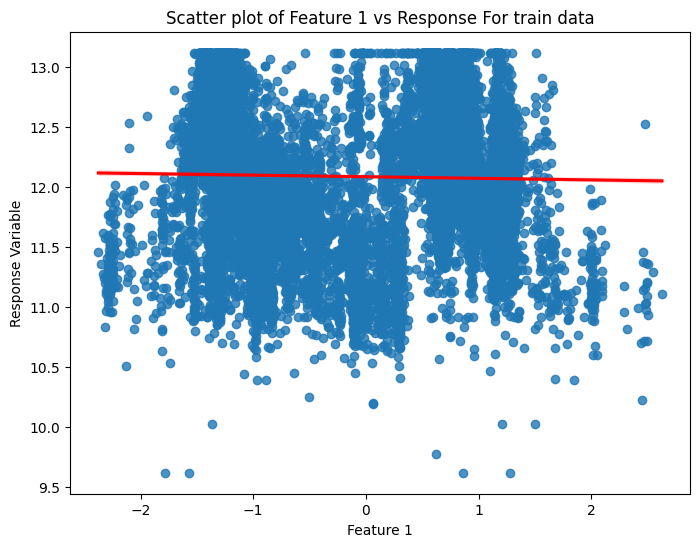

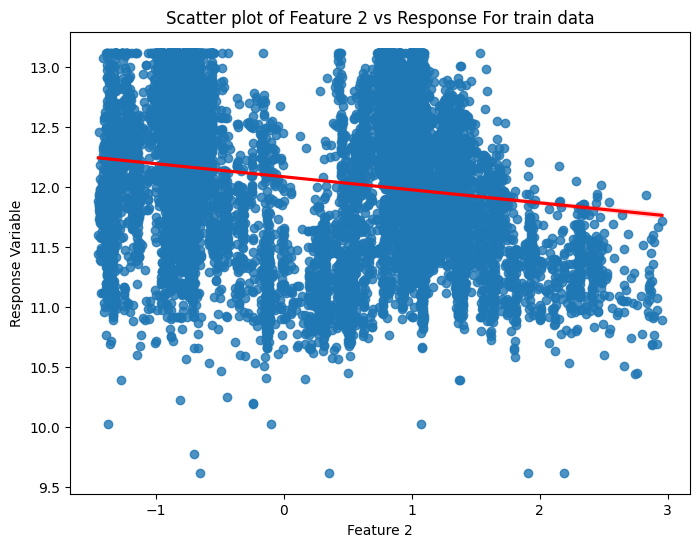

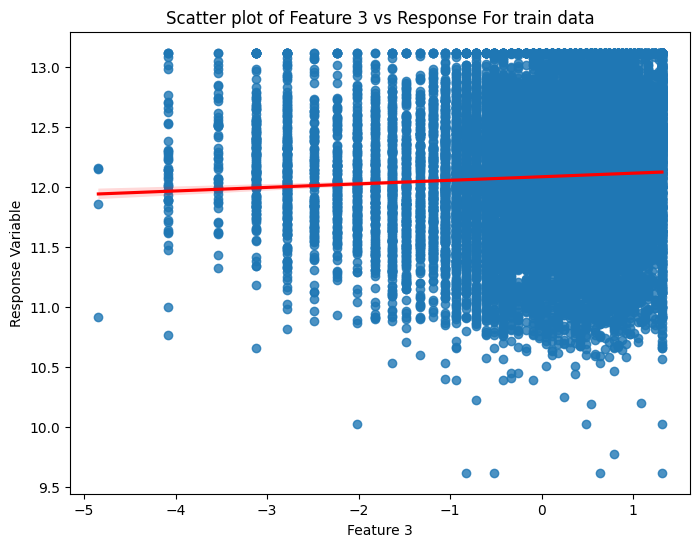

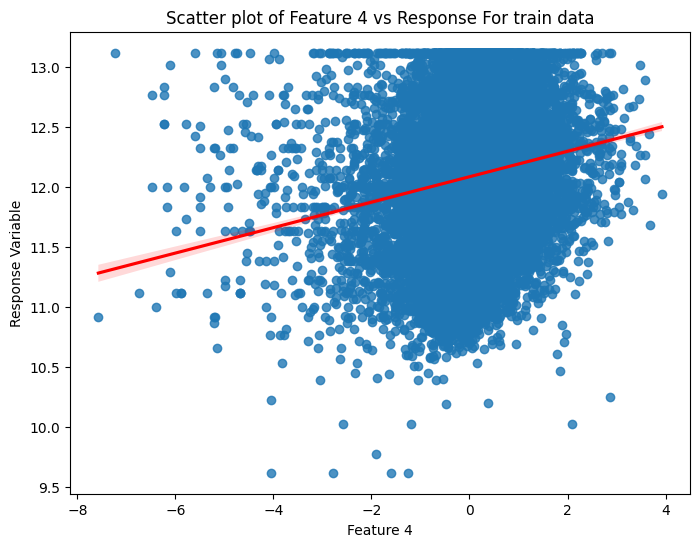

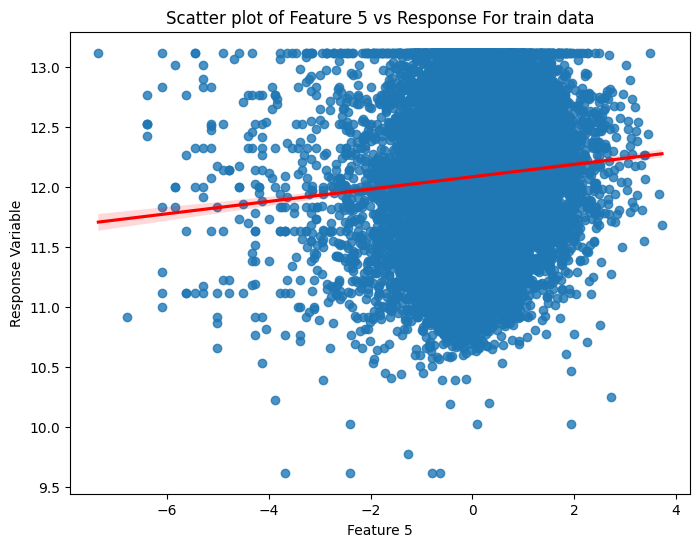

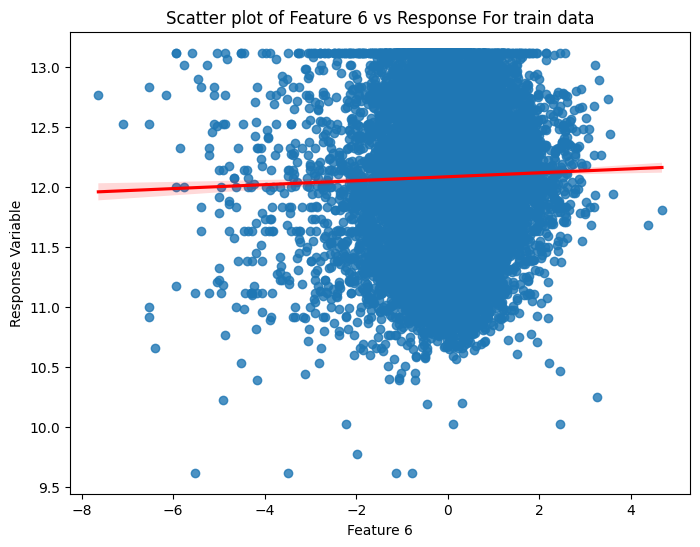

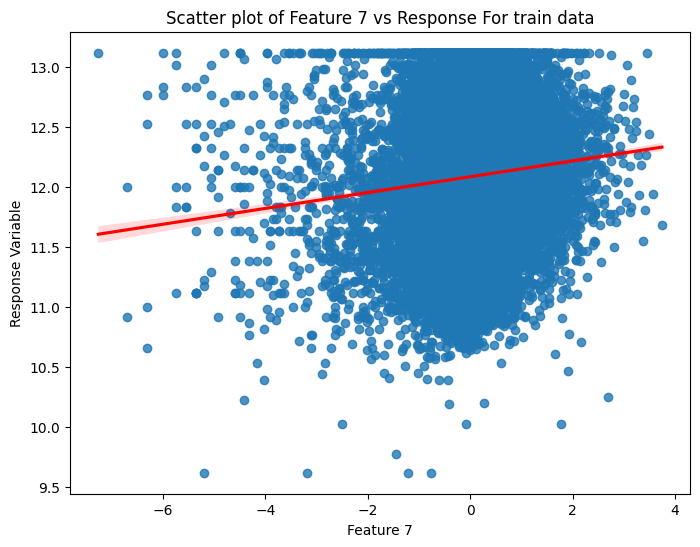

In [325]:
for i in range(min(7,x_train1.shape[1])):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x_train1[:, i], y=y_train1, line_kws={"color": "red"})
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Response Variable')
    plt.title(f'Scatter plot of Feature {i+1} vs Response For train data')
    plt.show()

Coefficients: [-0.34913632 -0.37060845  0.02898539 -0.26640522  0.44949764 -0.30928017
  0.20251984  0.33295102 -0.28067279 -0.3959225  -0.19405191 -0.20937402
 -0.08392608  0.00574785]
Intercept: 12.086960576720436


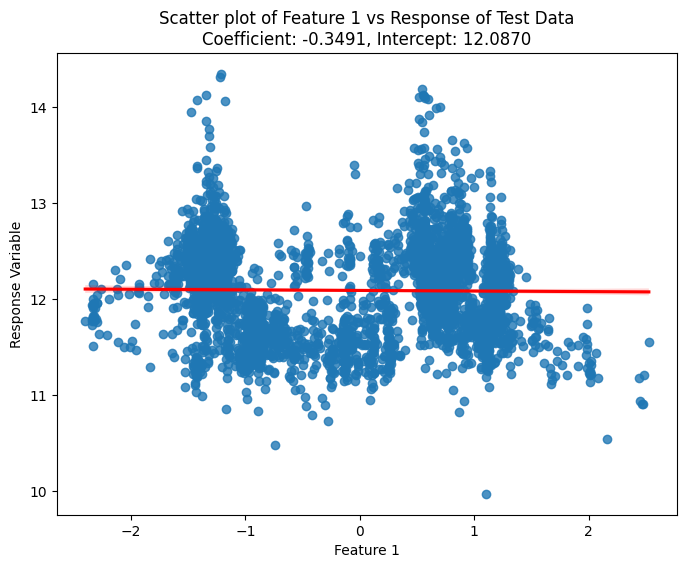

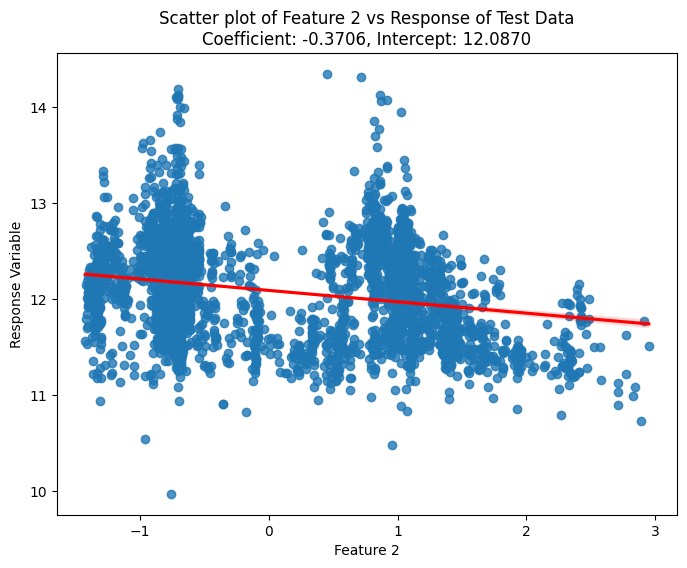

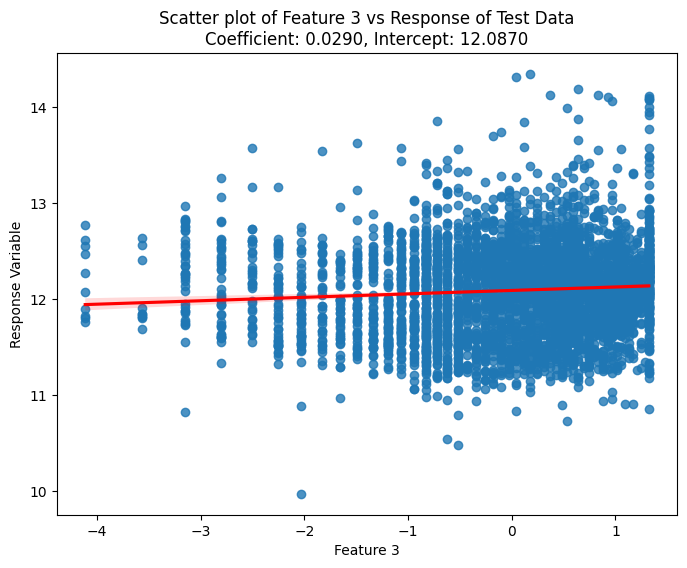

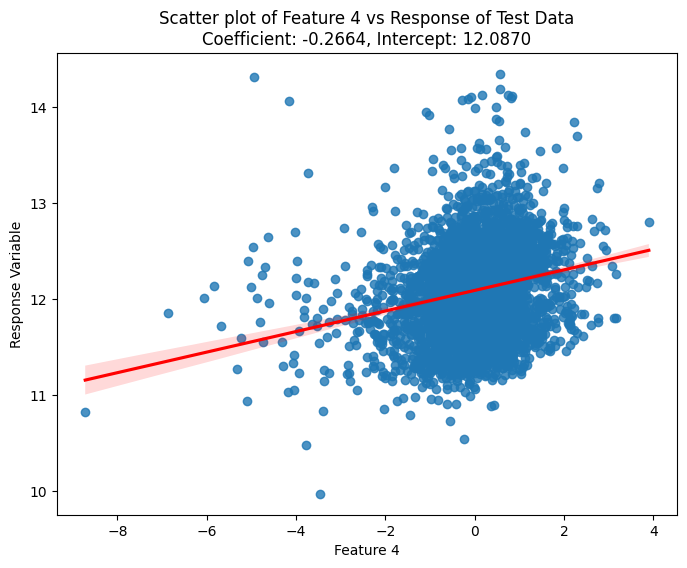

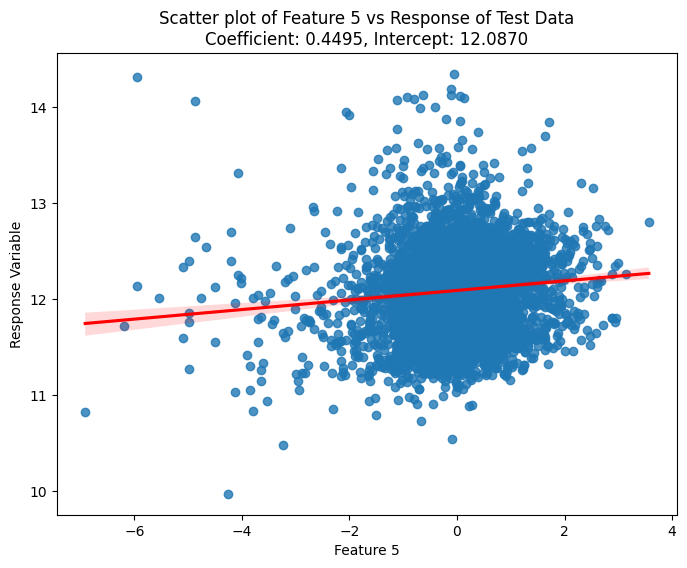

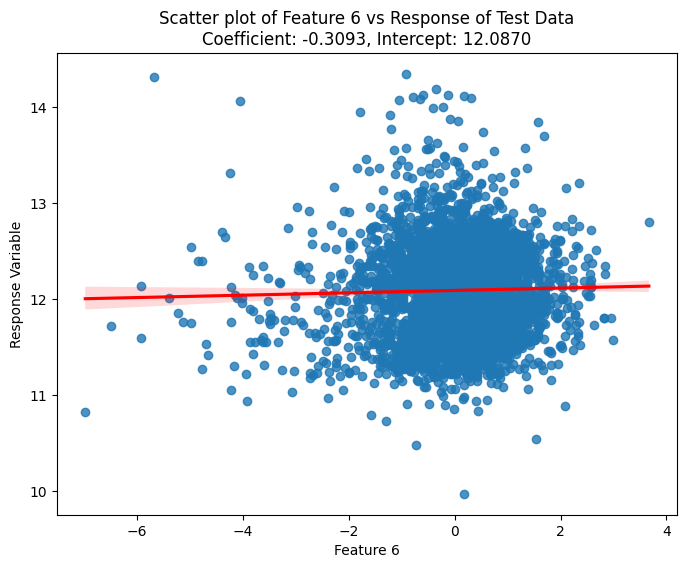

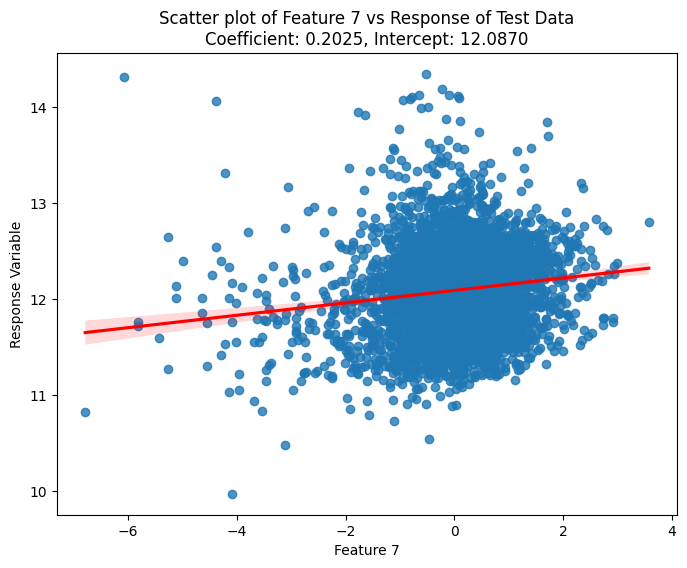

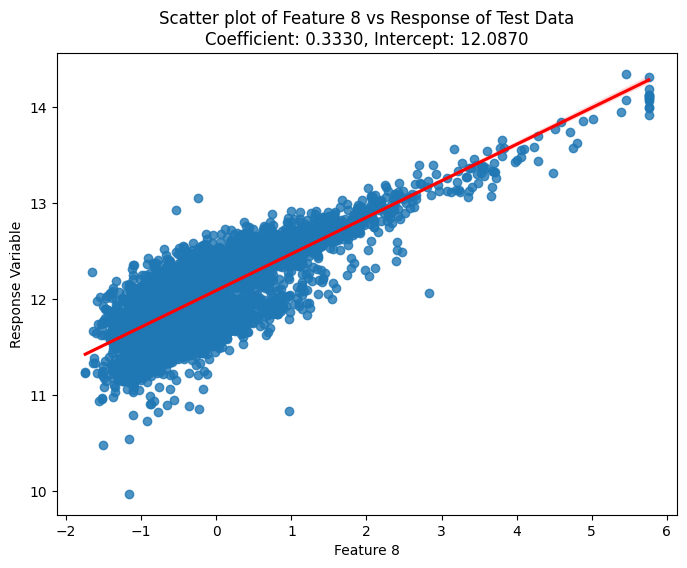

In [327]:
coefficients = LR.coef_.flatten() 
intercept = LR.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

for i in range(min(8, x_test1.shape[1])): 
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x_test1[:, i], y=y_pred, line_kws={"color": "red"})
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Response Variable')
    plt.title(f'Scatter plot of Feature {i+1} vs Response of Test Data\nCoefficient: {coefficients[i]:.4f}, Intercept: {intercept:.4f}')
    plt.show()

In [328]:

mae = mean_absolute_error(y_test1, y_pred)
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.24016367749048131
Mean Squared Error (MSE): 0.10220618806043952
R-squared (R²): 0.6864787645853849
